In [21]:
import json
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Iterable, Dict

data_folder = "lab1/data/"

In [12]:
def plot_data(xs: Iterable, yss: List[Iterable], xlabel="x", ylabel="y", title=""):
    all_func = []
    for ys in yss:
        all_func.append(xs)
        all_func.append(ys)
    plt.plot(*all_func)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    return plt


In [13]:
def plot_data_legend(xs: Iterable, yss: Dict[str, Iterable], xlabel="x", ylabel="y", title=""):
    for key, ys in yss.items():
        plt.plot(xs, ys, label=key)
        plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    return plt

In [14]:
def plot_scatter(xs, yss, size=1):
    for xe, ye in zip(xs, yss):
        plt.scatter([xe] * len(ye), ye, c='k', marker=',', s=size)
    return plt

In [15]:
def from_json(filename: str):
    input_file = open(filename)
    return json.load(input_file)


### Wzrost błędu względnego w trakcie sumowania

<IPython.core.display.Javascript object>


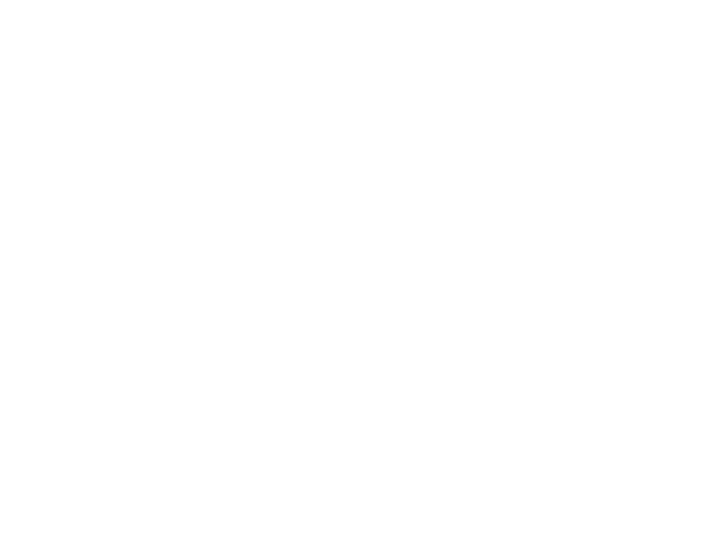

In [16]:
%matplotlib notebook
xs = from_json(data_folder+"sum_error_xs.json")
ys = from_json(data_folder+"sum_error.json")
fig = plot_data(xs, [ys], xlabel="ilość sumowań", ylabel="błąd względny", title="wzrost błędu względnego sumowania")


In [25]:
%matplotlib notebook
xs = from_json(data_folder+"t_xs.json")
ys1 = from_json(data_folder+"t_float.json")
ys2 = from_json(data_folder+"t_double.json")
fig = plot_data_legend(xs, {"float": ys1, "double": ys2}, xlabel="n-ty wyraz", ylabel="xn", title="trajektorie mapy logistycznej")


<IPython.core.display.Javascript object>

In [24]:
#bifurcation diagram
%matplotlib notebook

xs = from_json(data_folder+"bif_diagram0.70_xs.json")
ys = from_json(data_folder+"bif_diagram0.70.json")
# fig = plot_data(xs, ys, xlabel="ilość sumowań", ylabel="błąd względny", title="wzrost błędu względnego sumowania")
fig = plot_scatter(xs, ys, size=0.5)


<IPython.core.display.Javascript object>

In [26]:
# general functions for ex. 4

def logistic_map(r, x):
    return r*x*(1-x)


def plot_bifurcation(x_density, r_range, y_density, x):
    r = np.linspace(r_range[0], r_range[1], x_density)

    fig, ax = plt.subplots(1, 1)

    skip = 300
    for i in range(skip):
        x = logistic_map(r, x)

    for i in range(y_density):
        x = logistic_map(r, x)
        ax.plot(r, x, ',b', alpha=.3)

    ax.set_xlim(r_range[0], r_range[1])
    ax.set_title("Diagram bifurkacyjny")
    plt.xlabel("r")
    plt.ylabel("xn")


def iterate_xn_float(x, r, n):
    x = np.float32(x)
    r = np.float32(r)
    xs = [np.float32(i) for i in range(n)]
    ys = []
    for i in range(n):
        x = np.float32(logistic_map(r, x))
        ys.append(x)

    return xs, ys

def iterate_xn_double(x, r, n):
    x = np.float64(x)
    r = np.float64(r)
    xs = [np.float64(i) for i in range(n)]
    ys = []
    for i in range(n):
        x = np.float64(logistic_map(r, x))
        ys.append(x)

    return xs, ys


<IPython.core.display.Javascript object>


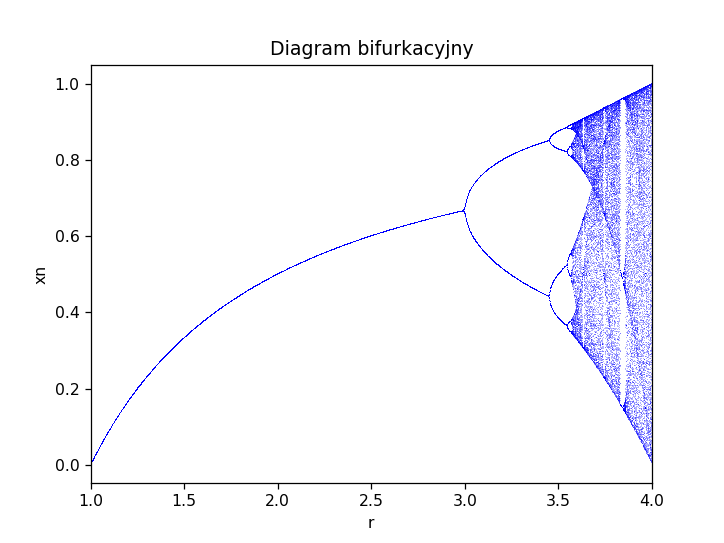

In [27]:
## bifurcation diagram
plot_bifurcation(2000, (1, 4), 100, 0.6)
   

In [ ]:
#trajectories

def plot_trajectories(x, r, n):
    fig, ax = plt.subplots(1, 1)

    Ox, Oy = iterate_xn_float(x, r, n)
    plt.plot(Ox, Oy, c="blue", linewidth=1)

    Ox, Oy = iterate_xn_double(x, r, n)
    plt.plot(Ox, Oy, c="red", linewidth=1)

    ax.set_xlim(0, n)
    ax.set_title("trajectories comparison")
    plt.xlabel("n")
    plt.ylabel("xn")
    
plot_trajectories(0.1, 3.75, 70)


In [30]:
# count iterations to zero
def iter_to_zero(x, r=np.float32(4.0)):
    x = np.float32(x)
    it = 0
    while x > 0 and it < 50000:
        it += 1
        x = np.float32(logistic_map(r, x))
    if it == 50000:
        return -1
    return it

for x in np.linspace(0, 1, num=100):
        print('x0 = %.2f'%x, " iter= ",iter_to_zero(x))


x0 = 0.00  iter=  0
x0 = 0.01  iter=  3339
x0 = 0.02  iter=  1533
x0 = 0.03  iter=  2612
x0 = 0.04  iter=  2560
x0 = 0.05  iter=  2064
x0 = 0.06  iter=  407
x0 = 0.07  iter=  324
x0 = 0.08  iter=  1998
x0 = 0.09  iter=  4027
x0 = 0.10  iter=  1038
x0 = 0.11  iter=  896
x0 = 0.12  iter=  1194
x0 = 0.13  iter=  -1
x0 = 0.14  iter=  1230
x0 = 0.15  iter=  2525
x0 = 0.16  iter=  2856
x0 = 0.17  iter=  1084
x0 = 0.18  iter=  1923
x0 = 0.19  iter=  1155
x0 = 0.20  iter=  617
x0 = 0.21  iter=  1991
x0 = 0.22  iter=  5
x0 = 0.23  iter=  3568
x0 = 0.24  iter=  3658
x0 = 0.25  iter=  174
x0 = 0.26  iter=  2366
x0 = 0.27  iter=  -1
x0 = 0.28  iter=  -1
x0 = 0.29  iter=  2409
x0 = 0.30  iter=  1651
x0 = 0.31  iter=  3147
x0 = 0.32  iter=  -1
x0 = 0.33  iter=  897
x0 = 0.34  iter=  2323
x0 = 0.35  iter=  3922
x0 = 0.36  iter=  3115
x0 = 0.37  iter=  1349
x0 = 0.38  iter=  1386
x0 = 0.39  iter=  759
x0 = 0.40  iter=  4339
x0 = 0.41  iter=  1250
x0 = 0.42  iter=  1297
x0 = 0.43  iter=  1244
x0 = 0.44